In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse

from models import *
import wandb

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [3]:
state = torch.load('./checkpoint/ckpt.pth')
state_net = state['net']

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
criterion = nn.CrossEntropyLoss()

In [5]:
net = VGG('VGG19')
net.load_state_dict(state_net)
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [6]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=0)

Files already downloaded and verified


In [13]:
testset.data.shape
# wandb can read arrays as images

(10000, 32, 32, 3)

In [17]:
i = 0

dataiter = iter(testloader)
predicted_total, actual_total = [], []

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):
        if i > 5:
            break
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        
        images, labels = dataiter.next()

        test_loss = loss.item()
        _, predicted = outputs.max(1)
        # print(predicted)
        total = targets.size(0)
        correct = predicted.eq(targets).sum().item()
        predicted_total.extend(list(predicted.cpu().detach().numpy()))
        actual_total.extend(list(targets.cpu().detach().numpy()))
        # print(correct, total, test_loss)

        # for actual, pred, img in zip(targets, predicted, images):
        #     imshow(img)
        #     print(classes[actual], classes[pred])
        
        # print(len(predicted), len(images))
        i += 1

In [18]:
predicted_total, actual_total

([3,
  8,
  8,
  0,
  6,
  6,
  1,
  6,
  3,
  1,
  0,
  9,
  5,
  7,
  9,
  8,
  5,
  7,
  8,
  6,
  7,
  0,
  4,
  9,
  5,
  2,
  4,
  0,
  9,
  6,
  6,
  5,
  4,
  5,
  9,
  2,
  4,
  1,
  9,
  5,
  4,
  6,
  5,
  6,
  0,
  9,
  3,
  1,
  7,
  6,
  9,
  8,
  5,
  3,
  8,
  8,
  7,
  7,
  5,
  3,
  7,
  3,
  6,
  3,
  6,
  2,
  1,
  2,
  3,
  7,
  2,
  6,
  8,
  8,
  0,
  2,
  9,
  3,
  3,
  8,
  8,
  1,
  1,
  7,
  2,
  5,
  2,
  7,
  8,
  9,
  0,
  3,
  8,
  6,
  4,
  6,
  6,
  0,
  0,
  7,
  4,
  5,
  6,
  3,
  1,
  1,
  3,
  6,
  8,
  7,
  4,
  0,
  6,
  2,
  1,
  3,
  0,
  4,
  6,
  7,
  8,
  3,
  1,
  2,
  8,
  2,
  8,
  3,
  3,
  2,
  4,
  1,
  8,
  9,
  1,
  2,
  9,
  7,
  2,
  9,
  6,
  5,
  6,
  3,
  8,
  7,
  6,
  5,
  5,
  2,
  8,
  9,
  6,
  0,
  0,
  5,
  2,
  9,
  5,
  4,
  2,
  1,
  6,
  6,
  0,
  2,
  8,
  4,
  5,
  0,
  9,
  0,
  9,
  8,
  9,
  9,
  3,
  7,
  5,
  0,
  0,
  5,
  2,
  2,
  3,
  8,
  6,
  3,
  3,
  0,
  5,
  8,
  0,
  1,
  7,
  2,
  8,
  8,
  7,
  8,


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_total, predicted_total)

<AxesSubplot:>

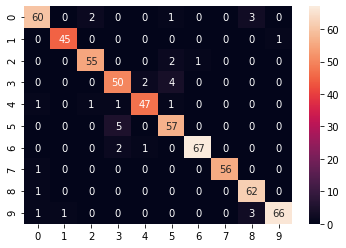

In [22]:
import seaborn as sn

sn.heatmap(cm, annot=True)